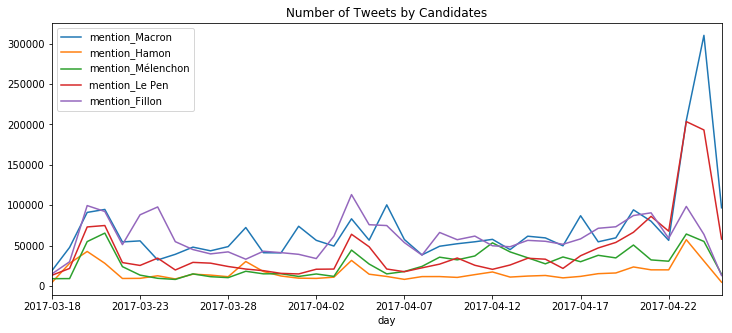

            mention_Macron  mention_Hamon  mention_Mélenchon  mention_Le Pen  \
day                                                                            
2017-03-18        0.313084       0.071815           0.148758        0.219366   
2017-03-19        0.349523       0.205307           0.066799        0.158930   
2017-03-20        0.252056       0.118202           0.152046        0.202242   
2017-03-21        0.266650       0.078966           0.184163        0.210638   
2017-03-22        0.324969       0.055160           0.142551        0.172471   
2017-03-23        0.290420       0.048997           0.069815        0.132247   
2017-03-24        0.172591       0.067534           0.050709        0.184742   
2017-03-25        0.300103       0.066419           0.061808        0.151534   
2017-03-26        0.316585       0.096092           0.098383        0.192158   
2017-03-27        0.319148       0.098500           0.084075        0.207038   
2017-03-28        0.356436       0.08358

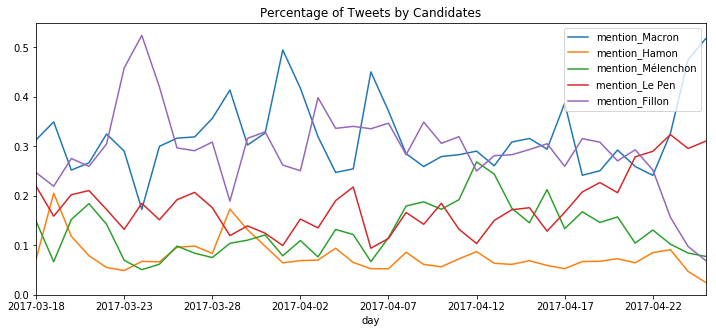

            mention_Macron  mention_Hamon  mention_Mélenchon  mention_Le Pen  \
day                                                                            
2017-03-18            7539           1644               3859            3910   
2017-03-19           19930          11140               3949            6358   
2017-03-20           37430          18713              23140           28520   
2017-03-21           44786          14386              28457           32241   
2017-03-22           20307           3762               9787           11331   
2017-03-23           21182           3207               5761            8324   
2017-03-24           12702           3987               3303            8026   
2017-03-25           14578           3160               2834            4531   
2017-03-26           17382           6394               6198            9555   
2017-03-27           16032           5338               4418            6814   
2017-03-28           18561           434

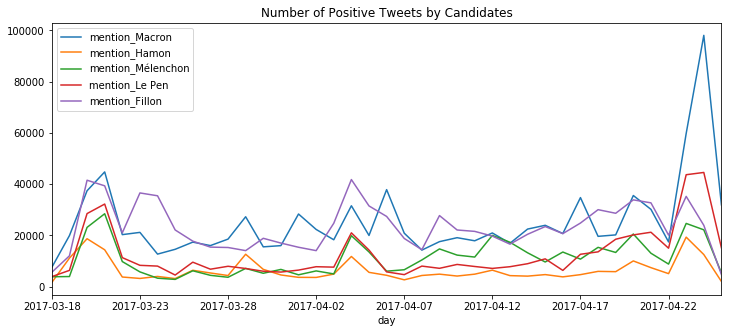

            mention_Macron  mention_Hamon  mention_Mélenchon  mention_Le Pen  \
day                                                                            
2017-03-18            3555            754               1171            1659   
2017-03-19            8562           5177               1294            2021   
2017-03-20           14191           7319               8827            9071   
2017-03-21           16082           4916              13188            9980   
2017-03-22           10517           1609               4216            4052   
2017-03-23           10507           2474               2292            3114   
2017-03-24            6554           3133               1736            2983   
2017-03-25            8259           1848               1274            1906   
2017-03-26           12016           2855               2429            2891   
2017-03-27            9023           2248               1661            3975   
2017-03-28            9592           191

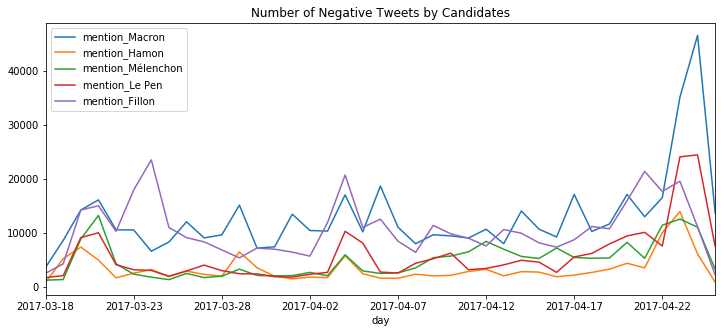

         mention_Mélenchon  mention_Fillon  mention_Le Pen  mention_Macron  \
0                        0               1               0               0   
1                        0               0               0               1   
2                        0               0               0               0   
3                        0               0               0               1   
4                        0               0               1               0   
5                        0               0               0               1   
6                        1               0               0               0   
8                        0               0               0               1   
9                        0               0               0               0   
11                       0               0               0               1   
12                       0               0               0               1   
13                       0               1               0      

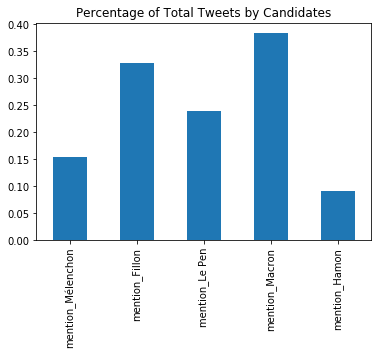

mention_Mélenchon    433069
mention_Fillon       906736
mention_Le Pen       491350
mention_Macron       990043
mention_Hamon        251208
dtype: int64
mention_Mélenchon    0.165880
mention_Fillon       0.347310
mention_Le Pen       0.188204
mention_Macron       0.379220
mention_Hamon        0.096221
dtype: float64


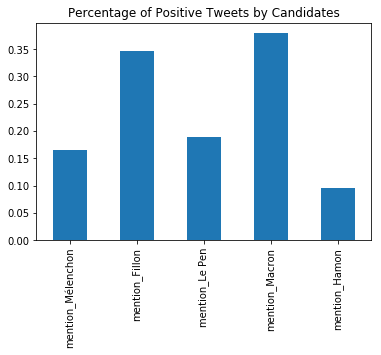

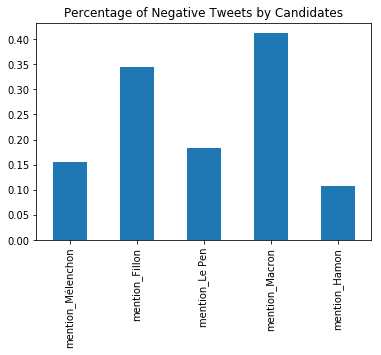

mention_Mélenchon    0.154250
mention_Fillon       0.327751
mention_Le Pen       0.238902
mention_Macron       0.383256
mention_Hamon        0.091561
dtype: float64


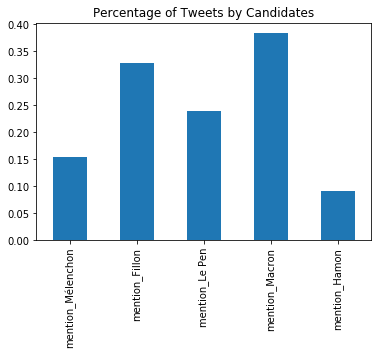

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sqlite3


class Draw:
    def __init__(self, sqlite_name):
        self.sqlite = sqlite3.connect(sqlite_name)

    def draw4(self, candidate_names):
        m_sql = ""
        condition = {}
        for x in candidate_names:
            m_sql = m_sql + "[" + x + "], "
            condition[x] = np.sum
        m_sql = "select " + m_sql + " day from whole_data"

        df = pd.read_sql_query(m_sql, self.sqlite)
        df = df.groupby('day').agg(condition)
        df.plot(figsize=(12,5))
        plt.title("Number of Tweets by Candidates")
        plt.show()

    def draw5(self, candidate_names):
        m_sql = ""
        condition = {}
        for x in candidate_names:
            m_sql = m_sql + "[" + x + "], "
            condition[x] = np.sum
        m_sql = "select " + m_sql + " day from whole_data"

        df = pd.read_sql_query(m_sql, self.sqlite)
        df = self.filter(df, candidate_names)
        df1 = df.groupby('day').agg(condition)
        percent = df1.T.div(df1.T.sum()).T
        print percent
        percent.plot(figsize=(12,5))
        plt.title("Percentage of Tweets by Candidates")
        plt.show()


    def draw6(self, candidate_names):
        m_sql = ""
        condition = {}
        for x in candidate_names:
            m_sql = m_sql + "[" + x + "], "
            condition[x] = np.sum
        m_sql = "select " + m_sql + " day, score from whole_data"
        df = pd.read_sql_query(m_sql, self.sqlite)
        df['score'] = df['score'].astype(np.float64)
        df = df[(df['score'] > 0) & (df['score'] <= 1)]
        df2 = df.groupby('day').agg(condition)
        print df2
        df2.plot(figsize=(12,5))
        plt.title("Number of Positive Tweets by Candidates")
        plt.show()

    def draw7(self, candidate_names):
        m_sql = ""
        condition = {}
        for x in candidate_names:
            m_sql = m_sql + "[" + x + "], "
            condition[x] = np.sum
        m_sql = "select " + m_sql + " day, score from whole_data"
        df = pd.read_sql_query(m_sql, self.sqlite)
        df['score'] = df['score'].astype(np.float64)
        df = df[(df['score'] >= -1) & (df['score'] < 0)]
        df2 = df.groupby('day').agg(condition)
        print df2
        df2.plot(figsize=(12,5))
        plt.title("Number of Negative Tweets by Candidates")
        plt.show()

#m_sql = m_sql + x + ", "
#m_sql = m_sql + "[" + x + "], "
    def draw8(self, candidate_names):
        m_sql = ""
        condition = {}
        i = 0
        for x in candidate_names:
            if i < len(candidate_names) - 1:
                m_sql = m_sql + "[" + x + "], "
            else:
                m_sql = m_sql + "[" + x + "]"
            condition[x] = np.sum
            i = i + 1

        m_sql = "select " + m_sql + " from whole_data"

        df = pd.read_sql_query(m_sql, self.sqlite)
        df = self.filter(df, candidate_names)
        print df
        df_sum = df.sum()
        df_percent = df_sum.div(df.count())
        print df_percent
        df_percent.plot(kind='bar', subplots=True)
        plt.title("Percentage of Total Tweets by Candidates")
        plt.show()

    def draw9(self, candidate_names):
        m_sql = ""
        condition = {}
        for x in candidate_names:
            m_sql = m_sql + "[" + x + "], "
            condition[x] = np.sum
        m_sql = "select " + m_sql + " score from whole_data"

        df = pd.read_sql_query(m_sql, self.sqlite)
        df = self.filter(df, candidate_names)
        df['score'] = df['score'].astype(np.float64)
        df_score_above_zero = df[(df['score'] > 0) & (df['score'] <= 1)]
        df_score_above_zero = df_score_above_zero.drop(['score'], axis=1)
        df_sum = df_score_above_zero.sum()
        print df_sum
        df_percent = df_sum.div(df_score_above_zero.count())
        print df_percent
        df_percent.plot(kind='bar', subplots=True)
        plt.title("Percentage of Positive Tweets by Candidates")
        plt.show()

    def draw10(self, candidate_names):
        m_sql = ""
        condition = {}
        for x in candidate_names:
            m_sql = m_sql + "[" + x + "], "
            condition[x] = np.sum
        m_sql = "select " + m_sql + " score from whole_data"

        df = pd.read_sql_query(m_sql, self.sqlite)
        df['score'] = df['score'].astype(np.float64)
        df_score_above_zero = df[(df['score'] >= -1) & (df['score'] < 0)]
        df_score_above_zero = self.filter(df_score_above_zero, candidate_names)
        df_score_above_zero = df_score_above_zero.drop(['score'], axis=1)
        df_sum = df_score_above_zero.sum()
        df_percent = df_sum.div(df_score_above_zero.count())
        df_percent.plot(kind='bar', subplots=True)
        plt.title("Percentage of Negative Tweets by Candidates")
        plt.show()

    def draw11(self, candidate_names):
        m_sql = ""
        condition = {}
        i = 0
        for x in candidate_names:
            if i < len(candidate_names) - 1:
                m_sql = m_sql + "[" + x + "], "
            else:
                m_sql = m_sql + "[" + x + "]"
            condition[x] = np.sum
            i = i + 1
        m_sql = "select " + m_sql + " from whole_data"

        df = pd.read_sql_query(m_sql, self.sqlite)
        df = self.filter(df, candidate_names)
        df_count = df.count()
        df_sum = df.sum()
        df_percent = df_sum.div(df_count)
        print df_percent
        df_percent.plot(kind='bar')
        plt.title("Percentage of Tweets by Candidates")
        plt.show()

    def filter(self, df, candidate_names):
        query = ""
        i = 0
        name_len = len(candidate_names)
        for name in candidate_names:
            df[name].astype(np.float64)
            i = i + 1
            if i < name_len:
                query = query + name + " > 0 | "
            else:
                query = query + name + " > 0"
        return df.query(query)
    
    def filter(self, df, candidate_names):
        return df[(df[candidate_names[0]] > 0) | (df[candidate_names[1]] > 0) | (df[candidate_names[2]] > 0)
                  | (df[candidate_names[3]] > 0) | (df[candidate_names[4]] > 0)]
        # query = ""
        # i = 0
        # name_len = len(candidate_names)
        # for name in candidate_names:
        #     df[name].astype(np.float64)
        #     i = i + 1
        #     if i < name_len:
        #         query = query + "'"+name+"'" + "> 0 | "
        #     else:
        #         query = query + "'"+name+"'" + "> 0"
        # return df.query(query)

    def close(self):
        self.sqlite.close()


draw = Draw("/Users/vvde/Downloads/database.sqlite")
draw.draw4(["mention_Mélenchon", "mention_Fillon", "mention_Le Pen", "mention_Macron", "mention_Hamon"])
draw.draw5(["mention_Mélenchon", "mention_Fillon", "mention_Le Pen", "mention_Macron", "mention_Hamon"])
draw.draw6(["mention_Mélenchon", "mention_Fillon", "mention_Le Pen", "mention_Macron", "mention_Hamon"])
draw.draw7(["mention_Mélenchon", "mention_Fillon", "mention_Le Pen", "mention_Macron", "mention_Hamon"])
draw.draw8(["mention_Mélenchon", "mention_Fillon", "mention_Le Pen", "mention_Macron", "mention_Hamon"])
draw.draw9(["mention_Mélenchon", "mention_Fillon", "mention_Le Pen", "mention_Macron", "mention_Hamon"])
draw.draw10(["mention_Mélenchon", "mention_Fillon", "mention_Le Pen", "mention_Macron", "mention_Hamon"])
draw.draw11(["mention_Mélenchon", "mention_Fillon", "mention_Le Pen", "mention_Macron", "mention_Hamon"])
draw.close()
